In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score

In [5]:
titanic=pd.read_csv('C:\\Users\\USER\Downloads\\titanic_train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic.shape

(891, 12)

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Numeric columns=age,fare,passengerid     
categorical columns=survived,sex,pclass,sibsp,parched,embarked  
mixed columns=name,ticket,cabin

In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have 177 missing value of age column  
687 missing value of cabin  
2 missing value of embarked

In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


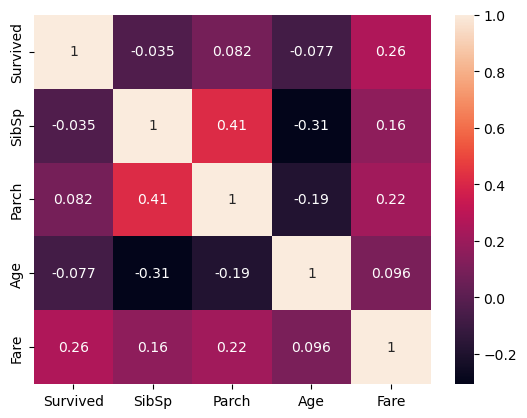

In [16]:
sns.heatmap(titanic[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
plt.show()

it shows correlation between target variable and other parameters  


# Bivariate analysis

In [17]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

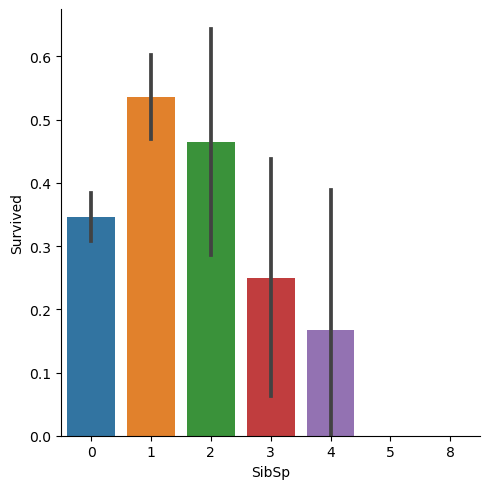

In [20]:
 sns.catplot(x = "SibSp", y = "Survived", data = titanic,kind='bar')

Passenger having 1 and 2 sibsp more chances of survival than others

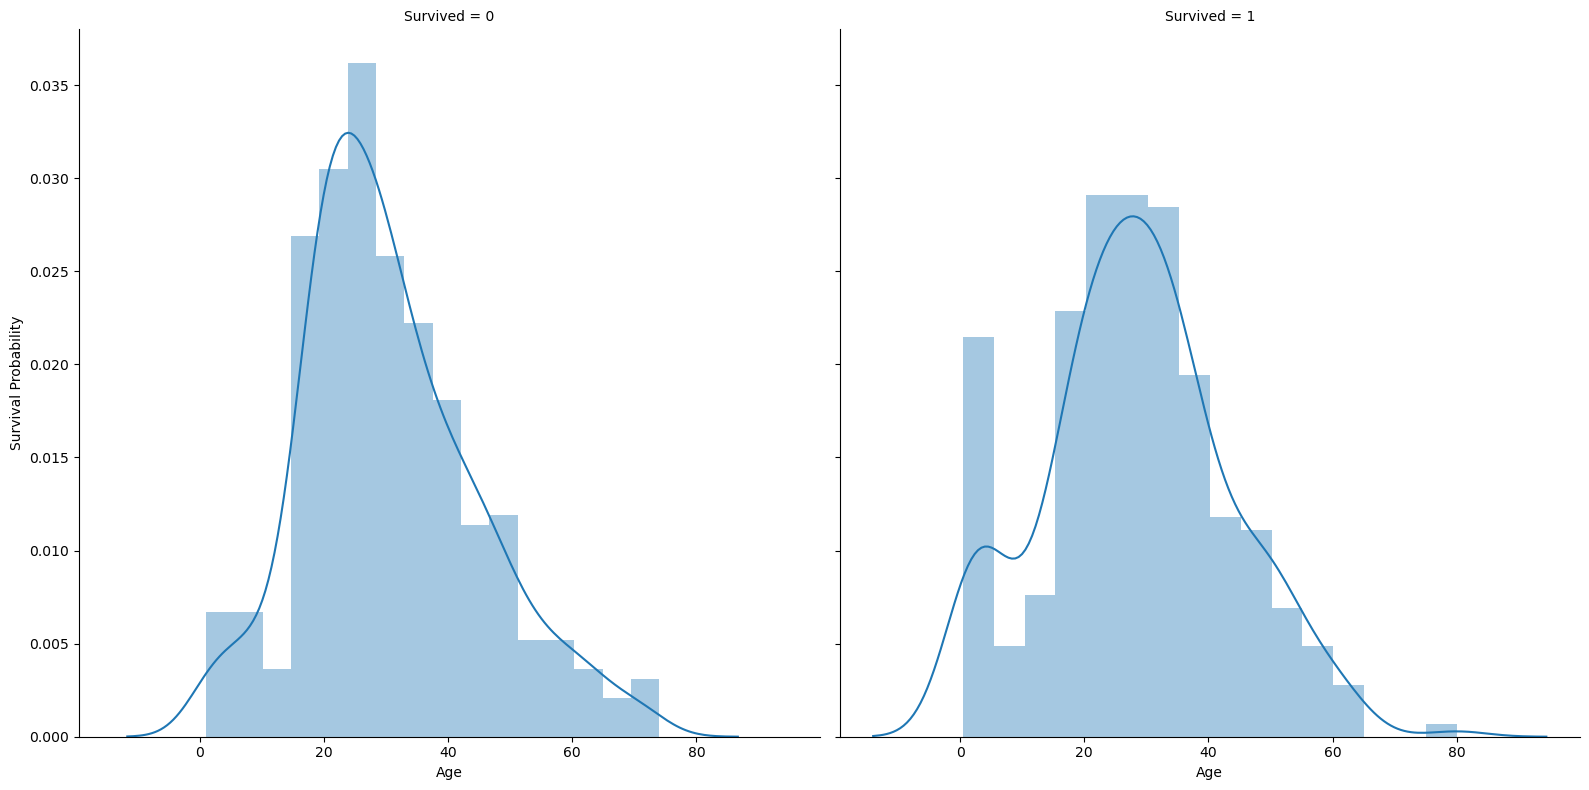

In [23]:
ageplot=sns.FacetGrid(titanic, col="Survived",height=8)
ageplot.map(sns.distplot, "Age")
ageplot.set_ylabels("Survival Probability")

Here graph shows more age less chances of survive

<Axes: xlabel='Sex', ylabel='Survived'>

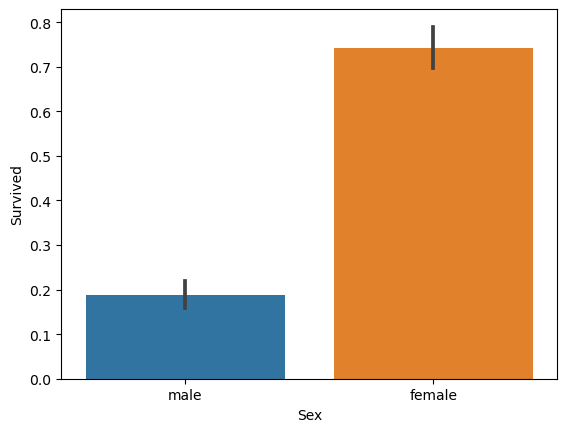

In [26]:
 sns.barplot(x="Sex", y="Survived", data=titanic)

In comparison to male,  female have more chances to survive

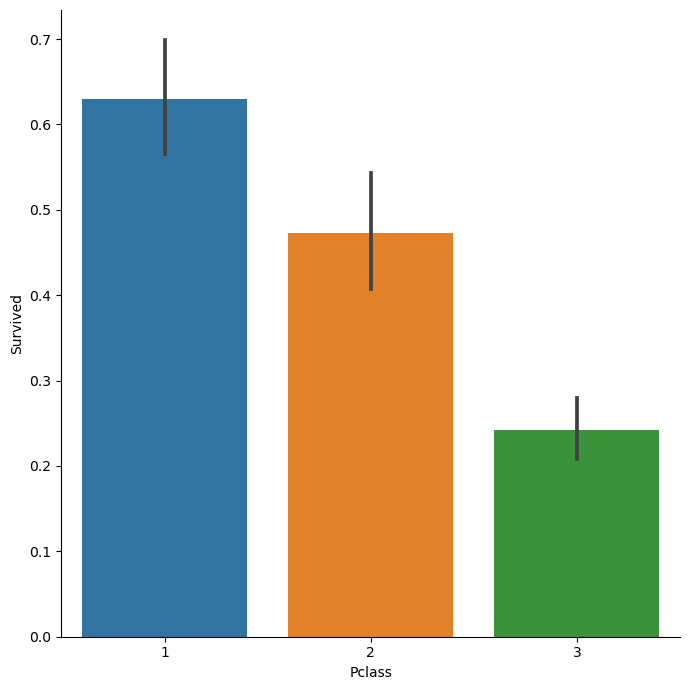

In [28]:
 sns.catplot(x = "Pclass", y="Survived", data = titanic, kind="bar", height = 7)


Higher class more chances of survive

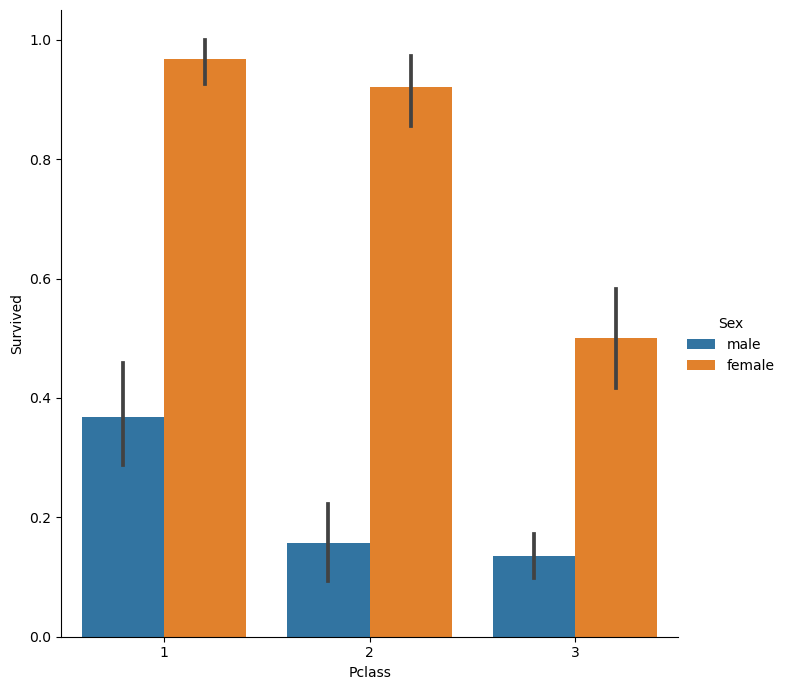

In [30]:
 sns.catplot(x = "Pclass", y="Survived", hue="Sex", data=titanic, height = 7, kind="bar")

In each class female have more chances of survive comparison to male

In [31]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
titanic["Embarked"] = titanic["Embarked"].fillna('S')

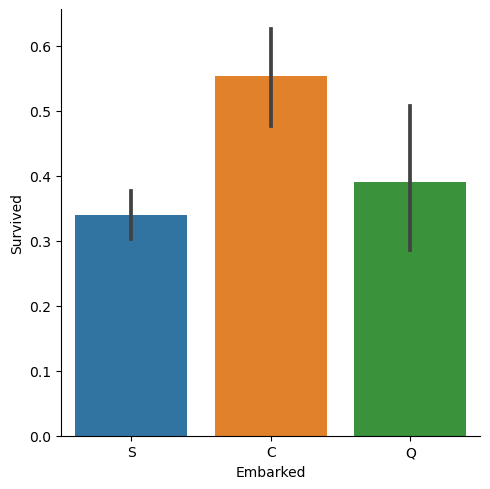

In [33]:
sns.catplot(x="Embarked", y="Survived", data=titanic, height = 5, kind="bar")

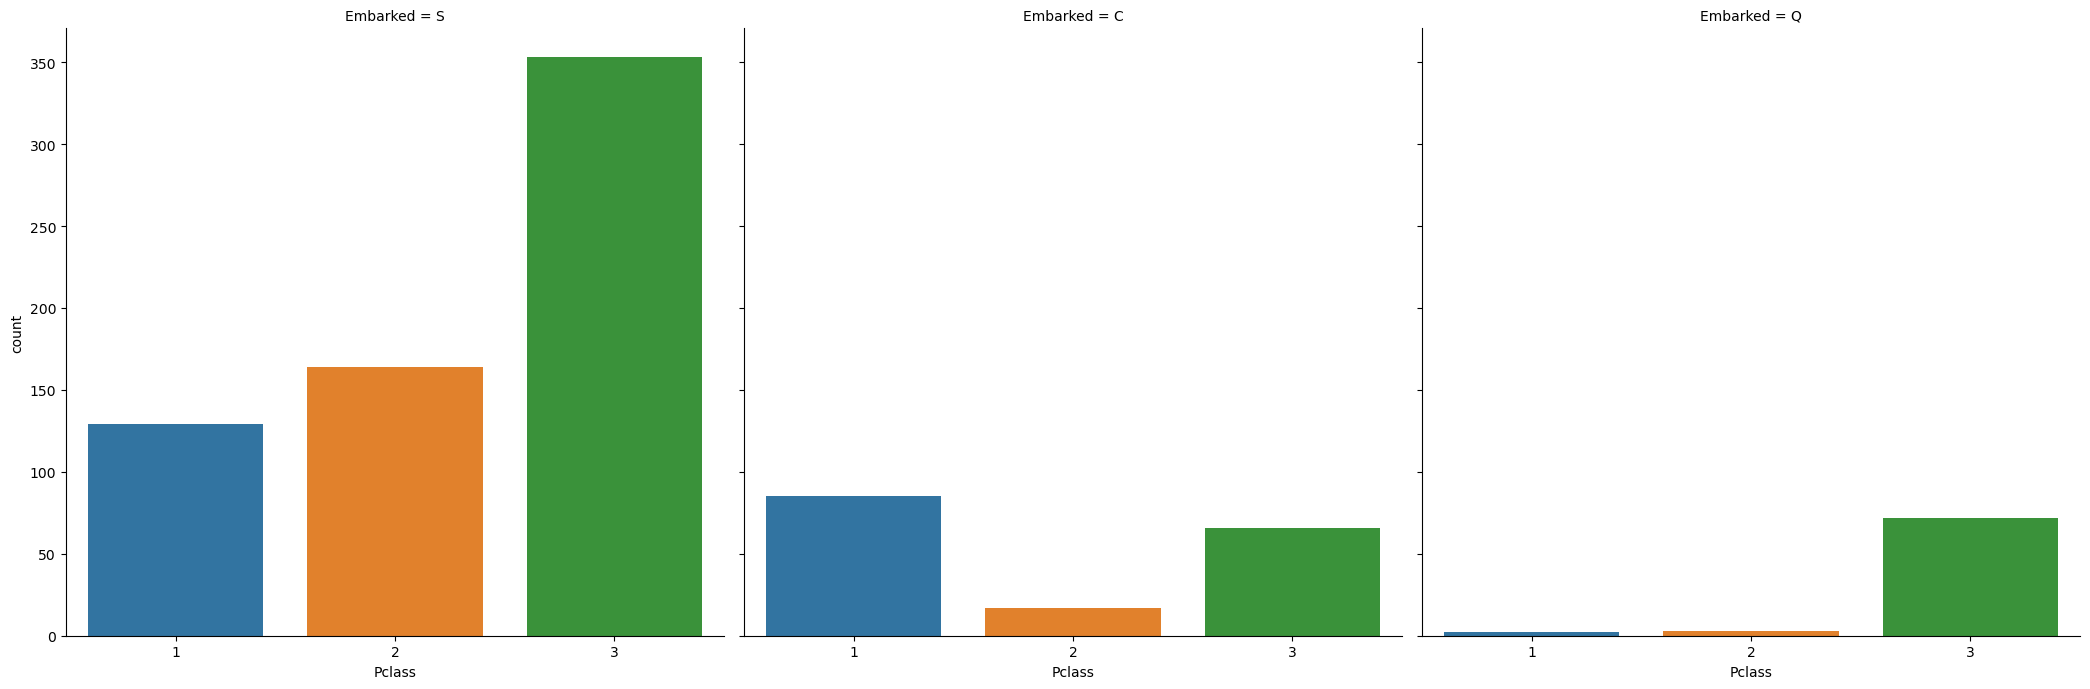

In [34]:
sns.catplot(x="Pclass", col="Embarked", data = titanic, kind="count", height=7)

Passengers embarked from C station, majority of them was from 1st class. That's why the survival probability of C embarked passengers higher.

In [35]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
titanic.drop(col_to_drop, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [36]:
genders = {"male":0, "female":1}
titanic["Sex"] = titanic["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
titanic["Embarked"] = titanic["Embarked"].map(ports)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


converting categorical value to numerical value

# model building

In [43]:
df_train_x = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
df_train_y = titanic[['Survived']]

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

In [47]:
mean = titanic["Age"].mean()
std = titanic["Age"].std()
print(mean)
print(std)

29.480549943883275
13.512659791508192


In [49]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_y_pred = rfc.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)

accuracy= 80.44692737430168


In [50]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100

print("accuracy=",lr_accuracy)

accuracy= 79.88826815642457


In [51]:
knc = KNeighborsClassifier(5)
knc.fit(x_train, y_train)
knc_y_pred = knc.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100

print("accuracy=",knc_accuracy)

accuracy= 71.50837988826815


In [53]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)
dtc_y_pred = dtc.predict(x_test)
dtc_accuracy = accuracy_score(y_test,dtc_y_pred)*100

print("accuracy=",dtc_accuracy)

accuracy= 78.77094972067039
